http://pandas.pydata.org/pandas-docs/stable/10min.html

# 10 Minutes to pandas

This is a short introduction to pandas, geared mainly for new users. You can see more complex recipes in the [Cookbook](http://pandas.pydata.org/pandas-docs/stable/cookbook.html#cookbook) 

Customarily, we import as follows:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

## Object Creation

See the [Data Structure Intro section](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dsintro) 

Creating a Series by passing a list of values, letting pandas create a default integer index:

In [3]:
s = pd.Series([1,3,5,np.nan,6,8])

In [4]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creating a DataFrame by passing a numpy array, with a datetime index and labeled columns:

In [6]:
dates = pd.date_range('20130101', periods=6)

In [7]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [8]:
df = pd.DataFrame( np.random.randn(6,4), index=dates, columns=['A','B','C','D']    )

In [9]:
df

,A,B,C,D
2013-01-01,-1.024595,0.805434,-2.428555,-0.566473
2013-01-02,2.481538,0.488162,0.529746,0.324945
2013-01-03,-0.339587,-0.527466,-0.520937,-1.075535
2013-01-04,-0.973562,0.888636,0.632345,1.057205
2013-01-05,-0.461558,-0.790257,-0.074644,1.248327
2013-01-06,-0.939553,1.884655,-0.456834,0.555089


Creating a DataFrame by passing a dict of objects that can be converted to series-like.

In [10]:
df2 = pd.DataFrame({'A':1.,
                   'B':pd.Timestamp('20130102'),
                   'C':pd.Series(1,index=list(range(4)),dtype='float32'),
                   'D':np.array([3]*4,dtype='int32'),
                   'E':pd.Categorical(["test","train","test","train"]),
                   'F':'foo'})

In [11]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


Having specific [dtypes](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-dtypes)

In [12]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

If you’re using IPython, tab completion for column names (as well as public attributes) is automatically enabled. Here’s a subset of the attributes that will be completed:

In [ ]:
#df2.<TAB>

As you can see, the columns A, B, C, and D are automatically tab completed. E is there as well; the rest of the attributes have been truncated for brevity.

## Viewing Data

See the [Basics section](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics) 

See the top & bottom rows of the frame

In [15]:
df.head()

,A,B,C,D
2013-01-01,-1.024595,0.805434,-2.428555,-0.566473
2013-01-02,2.481538,0.488162,0.529746,0.324945
2013-01-03,-0.339587,-0.527466,-0.520937,-1.075535


In [17]:
df.tail(3)

,A,B,C,D
2013-01-04,-0.973562,0.888636,0.632345,1.057205
2013-01-05,-0.461558,-0.790257,-0.074644,1.248327
2013-01-06,-0.939553,1.884655,-0.456834,0.555089


Display the index, columns, and the underlying numpy data

In [18]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [19]:
df.columns

Index([u'A', u'B', u'C', u'D'], dtype='object')

In [20]:
df.values

array([[-1.02459507,  0.80543355, -2.42855462, -0.56647281],
       [ 2.4815379 ,  0.48816249,  0.52974557,  0.32494486],
       [-0.33958749, -0.52746618, -0.52093708, -1.07553543],
       [-0.97356172,  0.8886361 ,  0.63234508,  1.05720548],
       [-0.46155762, -0.79025711, -0.07464354,  1.24832695],
       [-0.93955291,  1.88465464, -0.45683447,  0.55508936]])

Describe shows a quick statistic summary of your data

In [26]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.209553,0.458194,-0.386480,0.257260
std,1.349317,0.987087,1.110659,0.913268
min,-1.024595,-0.790257,-2.428555,-1.075535
25%,-0.965060,-0.273559,-0.504911,-0.343618
50%,-0.700555,0.646798,-0.265739,0.440017
75%,-0.370080,0.867835,0.378648,0.931676
max,2.481538,1.884655,0.632345,1.248327


Transposing your data

In [22]:
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,-1.024595,2.481538,-0.339587,-0.973562,-0.461558,-0.939553
B,0.805434,0.488162,-0.527466,0.888636,-0.790257,1.884655
C,-2.428555,0.529746,-0.520937,0.632345,-0.074644,-0.456834
D,-0.566473,0.324945,-1.075535,1.057205,1.248327,0.555089


Sorting by an axis

In [28]:
df.sort_index(axis=1, ascending=False)

,A,B,C,D
2013-01-01,-1.024595,0.805434,-2.428555,-0.566473
2013-01-02,2.481538,0.488162,0.529746,0.324945
2013-01-03,-0.339587,-0.527466,-0.520937,-1.075535
2013-01-04,-0.973562,0.888636,0.632345,1.057205
2013-01-05,-0.461558,-0.790257,-0.074644,1.248327
2013-01-06,-0.939553,1.884655,-0.456834,0.555089


Sorting by value

In [31]:
df.sort_values(by='B',ascending=False)

,A,B,C,D
2013-01-06,-0.939553,1.884655,-0.456834,0.555089
2013-01-04,-0.973562,0.888636,0.632345,1.057205
2013-01-01,-1.024595,0.805434,-2.428555,-0.566473
2013-01-02,2.481538,0.488162,0.529746,0.324945
2013-01-03,-0.339587,-0.527466,-0.520937,-1.075535
2013-01-05,-0.461558,-0.790257,-0.074644,1.248327


## Selection

**Note:** While standard Python / Numpy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, .at, .iat, .loc, .iloc and .ix.

See the indexing documentation [Indexing and Selecting Data](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing) and [MultiIndex / Advanced Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced)

### Getting

Selecting a single column, which yields a Series, equivalent to df.A

In [33]:
df['A']

2013-01-01   -1.024595
2013-01-02    2.481538
2013-01-03   -0.339587
2013-01-04   -0.973562
2013-01-05   -0.461558
2013-01-06   -0.939553
Freq: D, Name: A, dtype: float64

Selecting via [], which slices the rows.

In [35]:
df[0:3]

,A,B,C,D
2013-01-01,-1.024595,0.805434,-2.428555,-0.566473
2013-01-02,2.481538,0.488162,0.529746,0.324945
2013-01-03,-0.339587,-0.527466,-0.520937,-1.075535


In [36]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,2.481538,0.488162,0.529746,0.324945
2013-01-03,-0.339587,-0.527466,-0.520937,-1.075535
2013-01-04,-0.973562,0.888636,0.632345,1.057205


### Selection by Label

See more in [Selection by Label](Selection by Label)

For getting a cross section using a label

In [43]:
#print(dates[0])
df.loc[dates[0]]

A   -1.024595
B    0.805434
C   -2.428555
D   -0.566473
Name: 2013-01-01 00:00:00, dtype: float64

Selection by Label

In [44]:
df.loc[:,['A','B']]

,A,B
2013-01-01,-1.024595,0.805434
2013-01-02,2.481538,0.488162
2013-01-03,-0.339587,-0.527466
2013-01-04,-0.973562,0.888636
2013-01-05,-0.461558,-0.790257
2013-01-06,-0.939553,1.884655


Showing label slicing, both endpoints are included

In [45]:
df.loc['20130102':'20130105',['A','B']]

,A,B
2013-01-02,2.481538,0.488162
2013-01-03,-0.339587,-0.527466
2013-01-04,-0.973562,0.888636
2013-01-05,-0.461558,-0.790257


Reduction in the dimensions of the returned object

For getting a scalar value

In [46]:
df.loc['20130103','C']

-0.52093708481610235

### Selection by Position

See more in [Selection by Position](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-integer)

Select via the position of the passed integers

In [47]:
df.iloc[3]

A   -0.973562
B    0.888636
C    0.632345
D    1.057205
Name: 2013-01-04 00:00:00, dtype: float64

By integer slices, acting similar to numpy/python

In [48]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,-0.973562,0.888636
2013-01-05,-0.461558,-0.790257


By lists of integer position locations, similar to the numpy/python style

For slicing rows explicitly

In [49]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,2.481538,0.488162,0.529746,0.324945
2013-01-03,-0.339587,-0.527466,-0.520937,-1.075535


For slicing columns explicitly

In [50]:
df.iloc[:,1:3]

,B,C
2013-01-01,0.805434,-2.428555
2013-01-02,0.488162,0.529746
2013-01-03,-0.527466,-0.520937
2013-01-04,0.888636,0.632345
2013-01-05,-0.790257,-0.074644
2013-01-06,1.884655,-0.456834


For getting a value explicitly

In [51]:
df.iloc[1,1]

0.48816248618022851

For getting fast access to a scalar (equiv to the prior method)

In [52]:
df.iat[1,1]

0.48816248618022851

## Boolean Indexing

Using a single column’s values to select data.

In [53]:
df[df.A>0]

,A,B,C,D
2013-01-02,2.481538,0.488162,0.529746,0.324945


A where operation for getting.

In [54]:
df[df>0]

,A,B,C,D
2013-01-01,NaN,0.805434,NaN,NaN
2013-01-02,2.481538,0.488162,0.529746,0.324945
2013-01-03,NaN,NaN,NaN,NaN
2013-01-04,NaN,0.888636,0.632345,1.057205
2013-01-05,NaN,NaN,NaN,1.248327
2013-01-06,NaN,1.884655,NaN,0.555089


Using the isin() method for filtering:

In [55]:
df2 = df.copy()
df2

,A,B,C,D
2013-01-01,-1.024595,0.805434,-2.428555,-0.566473
2013-01-02,2.481538,0.488162,0.529746,0.324945
2013-01-03,-0.339587,-0.527466,-0.520937,-1.075535
2013-01-04,-0.973562,0.888636,0.632345,1.057205
2013-01-05,-0.461558,-0.790257,-0.074644,1.248327
2013-01-06,-0.939553,1.884655,-0.456834,0.555089


In [58]:
df2['E'] = ['one','one', 'two','three','four','three']

In [59]:
df2

,A,B,C,D,E
2013-01-01,-1.024595,0.805434,-2.428555,-0.566473,one
2013-01-02,2.481538,0.488162,0.529746,0.324945,one
2013-01-03,-0.339587,-0.527466,-0.520937,-1.075535,two
2013-01-04,-0.973562,0.888636,0.632345,1.057205,three
2013-01-05,-0.461558,-0.790257,-0.074644,1.248327,four
2013-01-06,-0.939553,1.884655,-0.456834,0.555089,three


In [60]:
df2[df2['package'].isin(['com.lge.launcher2'])]

,A,B,C,D,E
2013-01-03,-0.339587,-0.527466,-0.520937,-1.075535,two
2013-01-05,-0.461558,-0.790257,-0.074644,1.248327,four


## Setting

Setting a new column automatically aligns the data by the indexes

In [61]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102',periods=6))

In [62]:
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [63]:
df['F'] = s1

In [64]:
df

,A,B,C,D,F
2013-01-01,-1.024595,0.805434,-2.428555,-0.566473,NaN
2013-01-02,2.481538,0.488162,0.529746,0.324945,1.0
2013-01-03,-0.339587,-0.527466,-0.520937,-1.075535,2.0
2013-01-04,-0.973562,0.888636,0.632345,1.057205,3.0
2013-01-05,-0.461558,-0.790257,-0.074644,1.248327,4.0
2013-01-06,-0.939553,1.884655,-0.456834,0.555089,5.0


Setting values by label

In [65]:
df.at[dates[0],'A'] = 0

Setting values by position

In [67]:
df.iat[0,1] = 0

Setting by assigning with a numpy array

In [69]:
df.loc[:,'D'] = np.array([5] * len(df))

The result of the prior setting operations

In [71]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-2.428555,5,NaN
2013-01-02,2.481538,0.488162,0.529746,5,1.0
2013-01-03,-0.339587,-0.527466,-0.520937,5,2.0
2013-01-04,-0.973562,0.888636,0.632345,5,3.0
2013-01-05,-0.461558,-0.790257,-0.074644,5,4.0
2013-01-06,-0.939553,1.884655,-0.456834,5,5.0


A where operation with setting.

In [72]:
df2 = df.copy()

In [73]:
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-2.428555,5,NaN
2013-01-02,2.481538,0.488162,0.529746,5,1.0
2013-01-03,-0.339587,-0.527466,-0.520937,5,2.0
2013-01-04,-0.973562,0.888636,0.632345,5,3.0
2013-01-05,-0.461558,-0.790257,-0.074644,5,4.0
2013-01-06,-0.939553,1.884655,-0.456834,5,5.0


In [74]:
df2[df2 > 0] = -df2

In [75]:
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-2.428555,-5,NaN
2013-01-02,-2.481538,-0.488162,-0.529746,-5,-1.0
2013-01-03,-0.339587,-0.527466,-0.520937,-5,-2.0
2013-01-04,-0.973562,-0.888636,-0.632345,-5,-3.0
2013-01-05,-0.461558,-0.790257,-0.074644,-5,-4.0
2013-01-06,-0.939553,-1.884655,-0.456834,-5,-5.0


## Missing Data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations. See the Missing Data section

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.

In [76]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])

In [77]:
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-2.428555,5,NaN,NaN
2013-01-02,2.481538,0.488162,0.529746,5,1.0,NaN
2013-01-03,-0.339587,-0.527466,-0.520937,5,2.0,NaN
2013-01-04,-0.973562,0.888636,0.632345,5,3.0,NaN


In [78]:
df1.loc[dates[0]:dates[1],'E'] = 1

In [79]:
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-2.428555,5,NaN,1.0
2013-01-02,2.481538,0.488162,0.529746,5,1.0,1.0
2013-01-03,-0.339587,-0.527466,-0.520937,5,2.0,NaN
2013-01-04,-0.973562,0.888636,0.632345,5,3.0,NaN


To drop any rows that have missing data.

In [83]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,2.481538,0.488162,0.529746,5,1.0,1.0


Filling missing data

In [84]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-2.428555,5,5.0,1.0
2013-01-02,2.481538,0.488162,0.529746,5,1.0,1.0
2013-01-03,-0.339587,-0.527466,-0.520937,5,2.0,5.0
2013-01-04,-0.973562,0.888636,0.632345,5,3.0,5.0


To get the boolean mask where values are nan

In [85]:
pd.isnull(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## Operations

See the [Basic section on Binary Ops](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-binop)

### Stats

Operations in general exclude missing data.

Performing a descriptive statistic

In [87]:
df.mean()

A   -0.038787
B    0.323955
C   -0.386480
D    5.000000
F    3.000000
dtype: float64

Same operation on the other axis

In [89]:
df.mean(axis=1)

2013-01-01    0.642861
2013-01-02    1.899889
2013-01-03    1.122402
2013-01-04    1.709484
2013-01-05    1.534708
2013-01-06    2.097653
Freq: D, dtype: float64

Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically broadcasts along the specified dimension.

In [90]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)

In [91]:
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [93]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-1.339587,-1.527466,-1.520937,4.0,1.0
2013-01-04,-3.973562,-2.111364,-2.367655,2.0,0.0
2013-01-05,-5.461558,-5.790257,-5.074644,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


### Apply

Applying functions to the data

In [94]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-2.428555,5,NaN
2013-01-02,2.481538,0.488162,-1.898809,10,1.0
2013-01-03,2.141950,-0.039304,-2.419746,15,3.0
2013-01-04,1.168389,0.849332,-1.787401,20,6.0
2013-01-05,0.706831,0.059075,-1.862045,25,10.0
2013-01-06,-0.232722,1.943730,-2.318879,30,15.0


In [95]:
df.apply(lambda x: x.max() - x.min())

A    3.455100
B    2.674912
C    3.060900
D    0.000000
F    4.000000
dtype: float64

### Histogramming

See more at [Histogramming and Discretization](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-discretization)

In [96]:
s = pd.Series(np.random.randint(0, 7, size=10))

In [97]:
s

0    1
1    1
2    1
3    2
4    6
5    3
6    5
7    4
8    5
9    3
dtype: int64

In [98]:
s.value_counts()

1    3
5    2
3    2
6    1
4    1
2    1
dtype: int64

### String Methods

Series is equipped with a set of string processing methods in the str attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in str generally uses [regular expressions](https://docs.python.org/2/library/re.html) by default (and in some cases always uses them). See more at [Vectorized String Methods](http://pandas.pydata.org/pandas-docs/stable/text.html#text-string-methods).

In [99]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

In [100]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## Merge

### Concat

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

See the [Merging section](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging)

Concatenating pandas objects together with concat():

In [101]:
df = pd.DataFrame(np.random.randn(10, 4))

In [102]:
df

,0,1,2,3
0,-1.018412,-2.536809,-0.557569,-0.074263
1,-1.103016,-0.945053,2.561149,0.990225
2,1.001980,1.171294,-2.266965,0.584402
3,1.274745,0.979585,0.297155,0.566376
4,-0.278772,-1.106163,0.201721,-0.329072
5,1.780827,0.925738,1.787555,2.815955
6,-0.619511,-1.449588,-1.306294,-0.486475
7,-0.033169,-1.199260,0.279630,-1.001345
8,-1.176357,-1.216690,-0.221992,-0.305532
9,0.597442,1.839599,1.036549,-1.110430


In [104]:
# break it into pieces
pieces = [df[:3], df[3:7], df[7:]]
pieces

[          0         1         2         3
 0 -1.018412 -2.536809 -0.557569 -0.074263
 1 -1.103016 -0.945053  2.561149  0.990225
 2  1.001980  1.171294 -2.266965  0.584402,
           0         1         2         3
 3  1.274745  0.979585  0.297155  0.566376
 4 -0.278772 -1.106163  0.201721 -0.329072
 5  1.780827  0.925738  1.787555  2.815955
 6 -0.619511 -1.449588 -1.306294 -0.486475,
           0         1         2         3
 7 -0.033169 -1.199260  0.279630 -1.001345
 8 -1.176357 -1.216690 -0.221992 -0.305532
 9  0.597442  1.839599  1.036549 -1.110430]

In [105]:
pd.concat(pieces)

,0,1,2,3
0,-1.018412,-2.536809,-0.557569,-0.074263
1,-1.103016,-0.945053,2.561149,0.990225
2,1.001980,1.171294,-2.266965,0.584402
3,1.274745,0.979585,0.297155,0.566376
4,-0.278772,-1.106163,0.201721,-0.329072
5,1.780827,0.925738,1.787555,2.815955
6,-0.619511,-1.449588,-1.306294,-0.486475
7,-0.033169,-1.199260,0.279630,-1.001345
8,-1.176357,-1.216690,-0.221992,-0.305532
9,0.597442,1.839599,1.036549,-1.110430


### Join

SQL style merges. See the [Database style joining](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging-join)

In [ ]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})

In [ ]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [ ]:
left

In [ ]:
right

In [ ]:
pd.merge(left, right, on='key')

### Append

Append rows to a dataframe. See the [Appending](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging-concatenation)

In [106]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])

In [107]:
df

,A,B,C,D
0,-1.186438,-0.713210,0.980938,0.303479
1,0.163231,-0.821621,1.317694,-0.236050
2,-0.531056,-1.624811,1.594997,-1.163106
3,-0.435073,-0.163761,-0.216545,1.165413
4,-0.144382,-0.773955,0.888511,0.259473
5,0.115630,1.902274,-0.265652,0.006613
6,0.449670,-0.498671,0.901471,0.411731
7,1.311936,0.641999,1.710212,1.016600


In [109]:
s = df.iloc[3]
s

A   -0.435073
B   -0.163761
C   -0.216545
D    1.165413
Name: 3, dtype: float64

In [111]:
df.append(s,ignore_index=True)

,A,B,C,D
0,-1.186438,-0.713210,0.980938,0.303479
1,0.163231,-0.821621,1.317694,-0.236050
2,-0.531056,-1.624811,1.594997,-1.163106
3,-0.435073,-0.163761,-0.216545,1.165413
4,-0.144382,-0.773955,0.888511,0.259473
5,0.115630,1.902274,-0.265652,0.006613
6,0.449670,-0.498671,0.901471,0.411731
7,1.311936,0.641999,1.710212,1.016600
8,-0.435073,-0.163761,-0.216545,1.165413


## Grouping

By “group by” we are referring to a process involving one or more of the following steps

* **Splitting** the data into groups based on some criteria
* **Applying** a function to each group independently
* **Combining** the results into a data structure

See the [Grouping section](http://pandas.pydata.org/pandas-docs/stable/groupby.html#groupby)

In [112]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
                                    'B' : ['one', 'one', 'two', 'three','two', 'two', 'one', 'three'],
                                    'C' : np.random.randn(8),
                                     'D' : np.random.randn(8)})

In [113]:
df

,A,B,C,D
0,foo,one,0.572676,-0.792067
1,bar,one,-2.129082,-1.188968
2,foo,two,-0.903978,-0.588581
3,bar,three,-2.034559,0.031175
4,foo,two,-0.079229,0.111033
5,bar,two,-0.906254,-0.795790
6,foo,one,-2.139164,1.059115
7,foo,three,0.475646,-0.109081


In [115]:
grouped = df.groupby('A')
#print(grouped)
for i1, each_group in grouped:
    print('\n'+i1)
    print(each_group)


bar
     A      B         C         D
1  bar    one -2.129082 -1.188968
3  bar  three -2.034559  0.031175
5  bar    two -0.906254 -0.795790

foo
     A      B         C         D
0  foo    one  0.572676 -0.792067
2  foo    two -0.903978 -0.588581
4  foo    two -0.079229  0.111033
6  foo    one -2.139164  1.059115
7  foo  three  0.475646 -0.109081


Grouping and then applying a function sum to the resulting groups.

In [116]:
df.groupby('A').sum()

,C,D
A,,
bar,-5.069894,-1.953583
foo,-2.074049,-0.319582


In [117]:
grouped = df.groupby(['A','B'])
print(grouped)
for i1, each_group in grouped:
    print('\n')
    print(i1)
    print(each_group)



('bar', 'one')
     A    B         C         D
1  bar  one -2.129082 -1.188968


('bar', 'three')
     A      B         C         D
3  bar  three -2.034559  0.031175


('bar', 'two')
     A    B         C        D
5  bar  two -0.906254 -0.79579


('foo', 'one')
     A    B         C         D
0  foo  one  0.572676 -0.792067
6  foo  one -2.139164  1.059115


('foo', 'three')
     A      B         C         D
7  foo  three  0.475646 -0.109081


('foo', 'two')
     A    B         C         D
2  foo  two -0.903978 -0.588581
4  foo  two -0.079229  0.111033


In [118]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -2.129082 -1.188968
    three -2.034559  0.031175
    two   -0.906254 -0.795790
foo one   -1.566488  0.267048
    three  0.475646 -0.109081
    two   -0.983207 -0.477548

## Reshaping

See the sections on [Hierarchical Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced-hierarchical) and [Reshaping](http://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-stacking).

### Pivot Tables

See the section on [Pivot Tables](http://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-pivot).

In [ ]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                                    'B' : ['A', 'B', 'C'] * 4,
                                    'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                                    'D' : np.random.randn(12),
                                    'E' : np.random.randn(12)})

In [ ]:
df

We can produce pivot tables from this data very easily:

In [ ]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

## Time Series

pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications. See the [Time Series section](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#timeseries)

In [ ]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')

In [ ]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [ ]:
ts.describe()

In [ ]:
ts.head()

In [ ]:
ts.resample('5Min').sum()

Time zone representation

In [ ]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')

In [ ]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [ ]:
ts

In [ ]:
ts_utc = ts.tz_localize('UTC')

In [ ]:
ts_utc

Convert to another time zone

In [ ]:
ts_utc.tz_convert('US/Eastern')

Converting between time span representations

In [ ]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')

In [ ]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [ ]:
ts

In [ ]:
ps = ts.to_period()

In [ ]:
ps

In [ ]:
ps.to_timestamp()

## Categoricals

Since version 0.15, pandas can include categorical data in a DataFrame. For full docs, see the [categorical introduction](http://pandas.pydata.org/pandas-docs/stable/categorical.html#categorical) and the [API documentation](http://pandas.pydata.org/pandas-docs/stable/api.html#api-categorical).

In [ ]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})

Convert the raw grades to a categorical data type.

In [ ]:
df["grade"] = df["raw_grade"].astype("category")

In [ ]:
df["grade"]

Rename the categories to more meaningful names (assigning to Series.cat.categories is inplace!)

In [ ]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

Reorder the categories and simultaneously add the missing categories (methods under Series .cat return a new Series per default).

In [ ]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])

In [ ]:
df["grade"]

Sorting is per order in the categories, not lexical order.

In [ ]:
df.sort_values(by="grade")

Grouping by a categorical column shows also empty categories.

In [ ]:
df.groupby("grade").size()

## Plotting
[Plotting](http://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization) docs.

In [119]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

In [120]:
ts

2000-01-01   -0.501632
2000-01-02   -0.229053
2000-01-03    0.290745
2000-01-04   -1.036961
2000-01-05    0.674200
2000-01-06   -0.363620
2000-01-07    1.264999
2000-01-08    0.056212
2000-01-09    0.146827
2000-01-10    2.049861
2000-01-11   -0.853545
2000-01-12   -2.260474
2000-01-13   -1.566173
2000-01-14   -0.470784
2000-01-15   -1.007538
2000-01-16    0.576308
2000-01-17   -0.193572
2000-01-18    0.790666
2000-01-19   -1.240395
2000-01-20   -1.604114
2000-01-21    1.165707
2000-01-22   -1.754638
2000-01-23    0.689212
2000-01-24   -0.086032
2000-01-25   -1.069502
2000-01-26    0.131651
2000-01-27    0.875321
2000-01-28    0.856433
2000-01-29   -2.567773
2000-01-30   -0.985676
                ...   
2002-08-28   -1.156343
2002-08-29   -1.359679
2002-08-30   -0.578604
2002-08-31    0.489321
2002-09-01   -0.006397
2002-09-02   -0.020529
2002-09-03    0.011015
2002-09-04    0.711611
2002-09-05   -1.096317
2002-09-06   -0.714444
2002-09-07   -0.259630
2002-09-08    0.623686
2002-09-09 

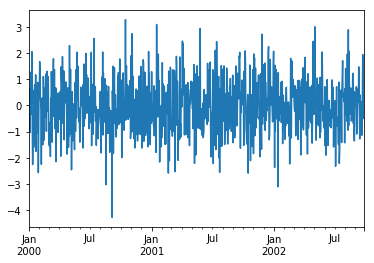

In [121]:
ts.plot()

In [122]:
ts = ts.cumsum()

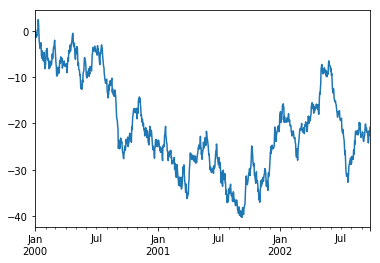

In [123]:
ts.plot()

On DataFrame, plot() is a convenience to plot all of the columns with labels:

In [126]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])

In [128]:
df = df.cumsum()

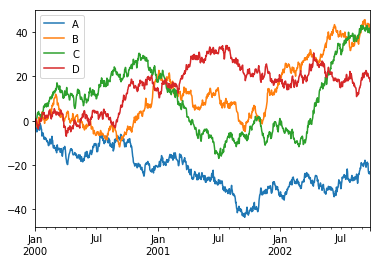

In [129]:
plt.figure(); df.plot(); plt.legend(loc='best')

## Getting Data In/Out

### CSV
[Writing to a csv file](http://pandas.pydata.org/pandas-docs/stable/io.html#io-store-in-csv)

In [131]:
df.head()

,A,B,C,D
2000-01-01,-0.750212,-0.103366,-0.939844,-0.950198
2000-01-02,-2.508521,0.565484,-1.659139,-1.003367
2000-01-03,-3.576765,-1.181103,-1.358047,0.771040
2000-01-04,-3.252969,-0.062015,0.837798,0.206067
2000-01-05,-4.581001,-0.679862,0.951761,0.311228


In [132]:
df.to_csv('foo.csv')

[Reading from a csv file](http://pandas.pydata.org/pandas-docs/stable/io.html#io-read-csv-table)

In [133]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.750212,-0.103366,-0.939844,-0.950198
1,2000-01-02,-2.508521,0.565484,-1.659139,-1.003367
2,2000-01-03,-3.576765,-1.181103,-1.358047,0.771040
3,2000-01-04,-3.252969,-0.062015,0.837798,0.206067
4,2000-01-05,-4.581001,-0.679862,0.951761,0.311228
5,2000-01-06,-5.035829,-2.827479,1.248006,-0.888832
6,2000-01-07,-3.724785,-2.622308,2.524419,-2.117481
7,2000-01-08,-3.471294,-1.708980,3.502226,-2.715172
8,2000-01-09,-4.064942,-1.639474,3.409723,-2.406927
9,2000-01-10,-3.959557,-1.306503,3.133926,-3.732179


### HDF5
Reading and writing to [HDFStores](http://pandas.pydata.org/pandas-docs/stable/io.html#io-hdf5)

Writing to a HDF5 Store

In [ ]:
df.to_hdf('foo.h5','df')

Reading from a HDF5 Store

In [ ]:
pd.read_hdf('foo.h5','df')

### Excel

Reading and writing to [MS Excel](http://pandas.pydata.org/pandas-docs/stable/io.html#io-excel)

Writing to an excel file

In [ ]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

Reading from an excel file

In [ ]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

### Gotchas
If you are trying an operation and you see an exception like:

In [ ]:
if pd.Series([False, True, False]):
    print("I was true")

See [Comparisons](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-compare) for an explanation and what to do.

See [Gotchas](http://pandas.pydata.org/pandas-docs/stable/gotchas.html#gotchas) as well.